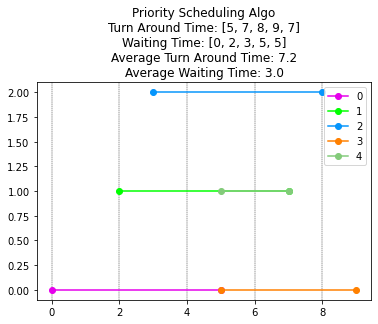

In [1]:
"""
Input Format:
job_count
cpu_count (processor_count)
For each process:
	process_name
	arrival_time, burst_time, priority
"""

from collections import deque
from functools import cmp_to_key

import matplotlib.pyplot as plt
import numpy as np
from distinctipy import distinctipy

def unique_color(n):
	# Get n distinct color
    return distinctipy.get_colors(n)

def average(a):
	return sum(a) / len(a);

def get_min_index(a):
	min_id = 0
	
	for i in range(len(a)):
		if a[i] < a[min_id]:
			min_id = i  
			
	return min_id 

def compare(x, y):
	if x[0] < y[0]:
		return -1
	elif x[0] > y[0]:
		return 1
	else:
		if x[2] < y[2]:
			return -1
		elif x[2] > y[2]:
			return 1 
		else:
			return 0
				 

if __name__ == "__main__":
	numb_of_jobs = int(input())
	numb_of_processors = int(input())
	
	jobs = []
	colors = unique_color(numb_of_jobs)
		
	for i in range(numb_of_jobs): 
		process_name = input()
		jobs.append([int(x) for x in input().split()] + [i])
	
	jobs.sort(key = cmp_to_key(compare))
	
	# Ready Queue
	priority_queue = deque()
	
	processor_state = [0 for i in range(numb_of_processors)]
	tat = [0 for i in range(numb_of_jobs)]
	wt = [0 for i in range(numb_of_jobs)]
	
	for i in range(numb_of_jobs):
		to_use = get_min_index(processor_state)
		
		start = max(processor_state[to_use], jobs[i][0])
		end = start + jobs[i][1] 
		
		plt.plot([start, end], [to_use, to_use], '-o', color = colors[i], label = jobs[i][3])
		
		processor_state[to_use] += jobs[i][1]
		tat[jobs[i][3]] = end
		wt[jobs[i][3]] = tat[jobs[i][3]] - jobs[i][1]
		
		plt.legend()
	
	plt.grid(axis = 'x', color = 'black', linestyle = '--', linewidth = '0.4')
	plt.title(f"Priority Scheduling Algo\nTurn Around Time: {tat}\nWaiting Time: {wt}\nAverage Turn Around Time: {average(tat)}\nAverage Waiting Time: {average(wt)}")
	plt.show()

Turn Around Time: [8, 11, 9, 10, 15]
Average Turn Around Time: 10.6
Waiting Around Time: [8, 11, 9, 10, 15]
Average Waiting Time: 10.6


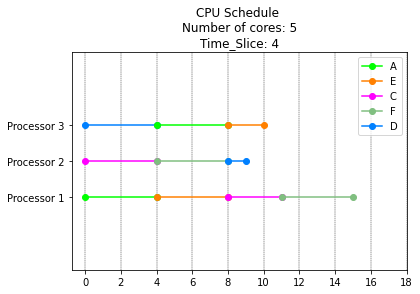

In [2]:
from collections import deque
import numpy as np

import matplotlib.pyplot as plt 
from distinctipy import distinctipy

def unique_color(n):
	# Get n distinct color
    return distinctipy.get_colors(n)

def prepare_queue(processes):
	rq = deque()
	
	for process in processes:
		rq.appendleft(process)
	
	return rq

def start_plotting(intervals, process_cnt, processor_cnt, p, time_slice):
	# p-> process_names as well as keeps track of whether that element is visited before or not
	col = unique_color(process_cnt)
	
	plt.title(f"CPU Schedule \nNumber of cores: {process_cnt}\nTime_Slice: {time_slice}")
	
	max_ = 0
	
	for i in range(len(intervals)):
		for process in intervals[i]:
			cur_col = col[process[0]]
			# To keep only distinct legends 
			if (not p[process[0]][1]):
				plt.plot([process[1], process[2]], [i, i], '-o', color = cur_col, label = p[process[0]][0])
				p[process[0]][1] = True
			else:
				plt.plot([process[1], process[2]], [i, i], '-o', color = cur_col)
				
			max_ = max(max_, process[2])
			
	process_names = [f"Processor {i + 1}" for i in range(processor_cnt)]
	
	plt.margins(y = 1, tight = False)
	plt.xticks(np.arange(0, max_ + 5, 2))
	plt.yticks(np.arange(0, processor_cnt, 1), process_names)
	plt.grid(axis = 'x', color = 'black', linestyle = '--', linewidth = '0.4')
	plt.legend()
	
	plt.show()
		
def get_timimg_diagram_data(n, processes, time_slice, p_cnt):
	# Use appendleft and pop to use deque as queue
	rq = prepare_queue(processes)
	
	# Keep track of time for each processor
	timer = [0 for i in range(p_cnt)]
	
	# Keep the intervals in following manner for each processor: 
	# processor-i -> (Process-Name, start, end)
	intervals = [[] for i in range(p_cnt)]
	
	# Take out top-(p_cnt) items decrease burst time and then if they are still non-zero remove it
	while(len(rq) != 0):
		usable_process = min(len(rq), p_cnt)
		
		for i in range(usable_process):
			# i denote which processor we are taking into account
			current_process = rq.pop()
			
			process_id = current_process[2]
			process_time = current_process[1] 
			
			# Add process name and start time (end time will be added later)
			current_interval = [process_id] 
			current_interval.append(timer[i])
			
			current_process[1] = max(0, process_time - time_slice)
			timer[i] += min(process_time, time_slice)
			
			# If the process is still not finished push it back into queue
			if (current_process[1] > 0):
				rq.appendleft(current_process)
			
			current_interval.append(timer[i])
			
			# Add current interval data
			intervals[i].append(current_interval)
			
	return intervals			

def average(arr):
	if len(arr):
		return sum(arr)/len(arr)
	
	return 0

def auxillary_details(intervals, p_cnt, arrival_time, processes):
	completion_time = [0 for i in range(p_cnt)]
	turn_around_time = [-1 for i in range(p_cnt)]
	waiting_time = [-1 for i in range(p_cnt)]
	
	for processor in intervals:
		for jobs in processor:
			completion_time[jobs[0]] = max(completion_time[jobs[0]], jobs[2])
	
	turn_around_time = [completion_time[i] - arrival_time[i] for i in range(p_cnt)]
	waiting_time = [turn_around_time[i] - processes[i][1] for i in range(p_cnt)]
	
	print(f"Turn Around Time: {turn_around_time}")
	print(f"Average Turn Around Time: {average(turn_around_time)}")
	
	print(f"Waiting Around Time: {waiting_time}")
	print(f"Average Waiting Time: {average(waiting_time)}")
	

if __name__ == "__main__":
	n = int(input())
	processes = []
	process_name = []
	
	for i in range(n):
		process_time = input().split() # Keeps process name and time
		process_time[1] = int(process_time[1]) 
		
		process_time.append(i) # Keeps Process id
		
		processes.append(process_time)
		process_name.append([process_time[0], False])
	
	
	# Arrival Time
	arrival_time = [int(x) for x in input().split()]
	
	time_slice = int(input())
	processor_cnt = int(input())
	
	intervals = get_timimg_diagram_data(n, processes, time_slice, processor_cnt)
	
	auxillary_details(intervals, n, arrival_time, processes)
	
	start_plotting(intervals, n, processor_cnt, process_name, time_slice)
	

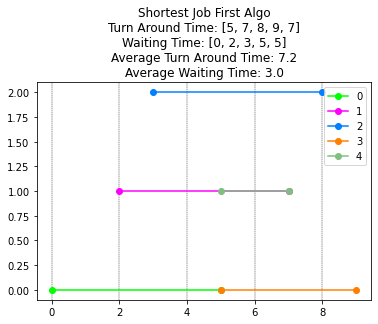

In [3]:
"""
Input Format:
job_count
cpu_count (processor_count)
For each process:
	process_name
	arrival_time, burst_time
"""

from collections import deque

import matplotlib.pyplot as plt
import numpy as np
from distinctipy import distinctipy

def unique_color(n):
	# Get n distinct color
    return distinctipy.get_colors(n)

def average(a):
	return sum(a) / len(a);

def get_min_index(a):
	min_ = 0
	
	for i in range(len(a)):
		if a[i] < a[min_]:
			min_ = i  
			
	return min_ 


if __name__ == "__main__":
	number_of_jobs = int(input())
	number_of_cpus = int(input())
	
	jobs = []
	colors = unique_color(number_of_jobs)
		
	for i in range(number_of_jobs): 
		process_name = input()
		jobs.append([int(x) for x in input().split()] + [i])
		
	# Ready Queue
	q = deque()
	
	processor_state = [0 for i in range(number_of_cpus)]
	tat = [0 for i in range(number_of_jobs)]
	wt = [0 for i in range(number_of_jobs)]
	
	for i in range(number_of_jobs):
		to_use = get_min_index(processor_state)
		
		start = max(processor_state[to_use], jobs[i][0])
		end = start + jobs[i][1] 
		
		plt.plot([start, end], [to_use, to_use], '-o', color = colors[i], label = jobs[i][2])
		
		processor_state[to_use] += jobs[i][1]
		tat[jobs[i][2]] = end
		wt[jobs[i][2]] = tat[jobs[i][2]] - jobs[i][1]
		
		plt.legend()
	
	plt.grid(axis = 'x', color = 'black', linestyle = '--', linewidth = '0.4')
	plt.title(f"Shortest Job First Algo\nTurn Around Time: {tat}\nWaiting Time: {wt}\nAverage Turn Around Time: {average(tat)}\nAverage Waiting Time: {average(wt)}")
	plt.show()
 

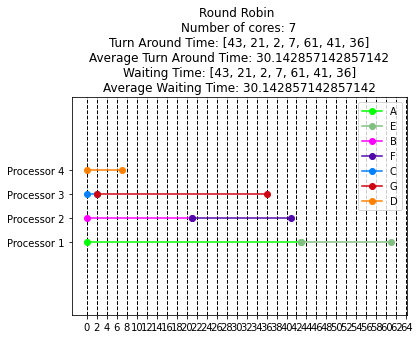

In [6]:
from collections import deque
import numpy as np

import matplotlib.pyplot as plt 
from distinctipy import distinctipy

def unique_color(n):
	# Get n distinct color
    return distinctipy.get_colors(n)

def prepare_ready_queue(processes):
	rq = deque()
	
	for process in processes:
		rq.appendleft(process)
	
	return rq

def auxillary_details(intervals, p_cnt, arrival_time, processes):
	completion_time = [0 for i in range(p_cnt)]
	turn_around_time = [-1 for i in range(p_cnt)]
	waiting_time = [-1 for i in range(p_cnt)]
	
	for processor in intervals:
		for jobs in processor:
			completion_time[jobs[0]] = max(completion_time[jobs[0]], jobs[2])
	
	turn_around_time = [completion_time[i] - arrival_time[i] for i in range(p_cnt)]
	waiting_time = [turn_around_time[i] - processes[i][1] for i in range(p_cnt)]
	
	return [turn_around_time, waiting_time]

def start_plotting(intervals, process_cnt, processor_cnt, p, time_slice, arrival_time):
	# p-> process_names as well as keeps track of whether that element is visited before or not
	col = unique_color(process_cnt)
	
	# Get auixllary data
	data = auxillary_details(intervals, process_cnt, arrival_time, processes)
	
	plt.title(f"Round Robin \nNumber of cores: {process_cnt}\nTurn Around Time: {data[0]}\nAverage Turn Around Time: {average(data[0])}\nWaiting Time: {data[1]}\nAverage Waiting Time: {average(data[1])}")
	
	xmax = 0
	
	for i in range(len(intervals)):
		for process in intervals[i]:
			cur_col = col[process[0]]
			# To keep only distinct legends 
			if (not p[process[0]][1]):
				plt.plot([process[1], process[2]], [i, i], '-o', color = cur_col, label = p[process[0]][0])
				p[process[0]][1] = True
			else:
				plt.plot([process[1], process[2]], [i, i], '-o', color = cur_col)
				
			xmax = max(xmax, process[2])
			
	process_names = [f"Processor {i + 1}" for i in range(processor_cnt)]
	
	plt.margins(y = 1, tight = False)
	plt.xticks(np.arange(0, xmax + 5, 2))
	plt.yticks(np.arange(0, processor_cnt, 1), process_names)
	plt.grid(axis = 'x', color = 'black', linestyle = '--', linewidth = '1.0')
	plt.legend()
	
	plt.show()
		
def get_timimg_diagram_data(n, processes, time_slice, p_cnt):
	# Use appendleft and pop to use deque as queue
	rq = prepare_ready_queue(processes)
	
	# Keep track of time for each processor
	timer = [0 for i in range(p_cnt)]
	
	# Keep the intervals in following manner for each processor: 
	# processor-i -> (Process-Name, start, end)
	intervals = [[] for i in range(p_cnt)]
	
	# Take out top-(p_cnt) items decrease burst time and then if they are still non-zero remove it
	while(len(rq) != 0):
		usable_process = min(len(rq), p_cnt)
		
		for i in range(usable_process):
			# i denote which processor we are taking into account
			current_process = rq.pop()
			
			process_id = current_process[2]
			process_time = current_process[1] 
			
			# Add process name and start time (end time will be added later)
			current_interval = [process_id] 
			current_interval.append(timer[i])
			
			current_process[1] = max(0, process_time - time_slice)
			timer[i] += min(process_time, time_slice)
			
			# If the process is still not finished push it back into queue
			if (current_process[1] > 0):
				rq.appendleft(current_process)
			
			current_interval.append(timer[i])
			
			# Add current interval data
			intervals[i].append(current_interval)
			
	return intervals			

def average(arr):
	if len(arr):
		return sum(arr)/len(arr)

if __name__ == "__main__":
	n = int(input())
	processes = []
	process_name = []
	
	for i in range(n):
		process_time = input().split() # Keeps process name and time
		process_time[1] = int(process_time[1]) 
		
		process_time.append(i) # Keeps Process id
		
		processes.append(process_time)
		process_name.append([process_time[0], False])
	
	
	# Arrival Time (All process are assumed to be at time t = 0)
	arrival_time = [0] * n
	
	time_slice = 1000000000000 # Keep infinite time slice so this acts like non pre emptive
	processor_cnt = int(input())
	
	intervals = get_timimg_diagram_data(n, processes, time_slice, processor_cnt)
		
	start_plotting(intervals, n, processor_cnt, process_name, time_slice, arrival_time)
	